In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import time

%matplotlib inline

In [14]:
caminho_bases = os.path.join('..', '..', 'bases', 'cocaina_facil')
exemplos = os.listdir(caminho_bases)
exemplos

['20180622002614007OS.jpg',
 'GLDU5615478 - droga em contêiner vazio.jpg',
 '201804270026300066S.jpg',
 'medu1277076 d.jpg',
 '2018022800262100B0S.jpg',
 '20181008002621001IS.jpg']

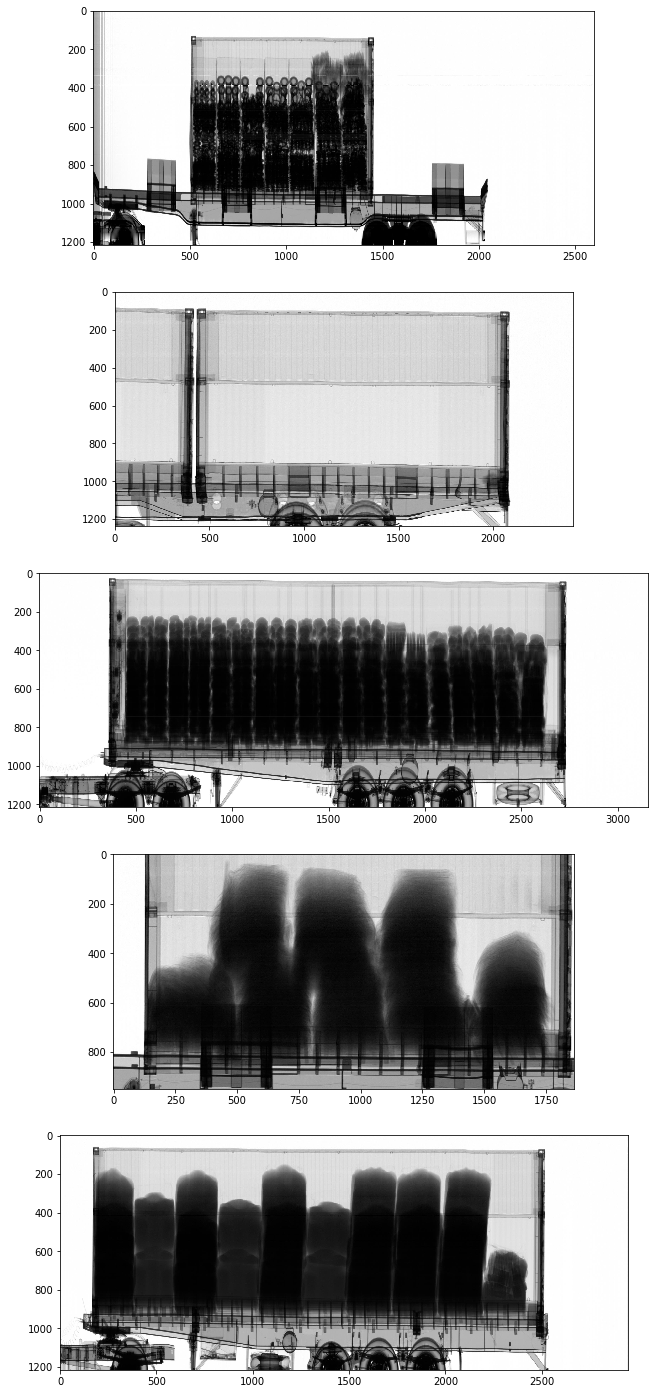

In [31]:
fig = plt.figure(figsize=(16, 25))
for i in range(5):
    img = Image.open(os.path.join(caminho_bases, exemplos[i]))
    ax = fig.add_subplot(5, 1, i + 1)
    ax.imshow(img)


In [81]:
def image_grid(img):
    w, h = img.size
    num_gridw = (w // 224) + 1
    num_gridh = (h // 224) + 1
    pace_w = w // num_gridw
    pace_h = h // num_gridh
    coords = []
    for y0 in range(0, h, pace_h):
        if y0 + 224 > h:
            y0 = h - 224
        for x0 in range(0, w, pace_w):
            if x0 + 224 > w:
                x0 = w - 224
            coords.append((x0, y0, x0 + 224, y0 + 224))
    
    return coords

img = img.resize((600, 400))
coords = image_grid(img)
print(img.size)
print(len(coords))
print(coords)




    

(600, 400)
6
[(0, 0, 224, 224), (200, 0, 424, 224), (376, 0, 600, 224), (0, 176, 224, 400), (200, 176, 424, 400), (376, 176, 600, 400)]


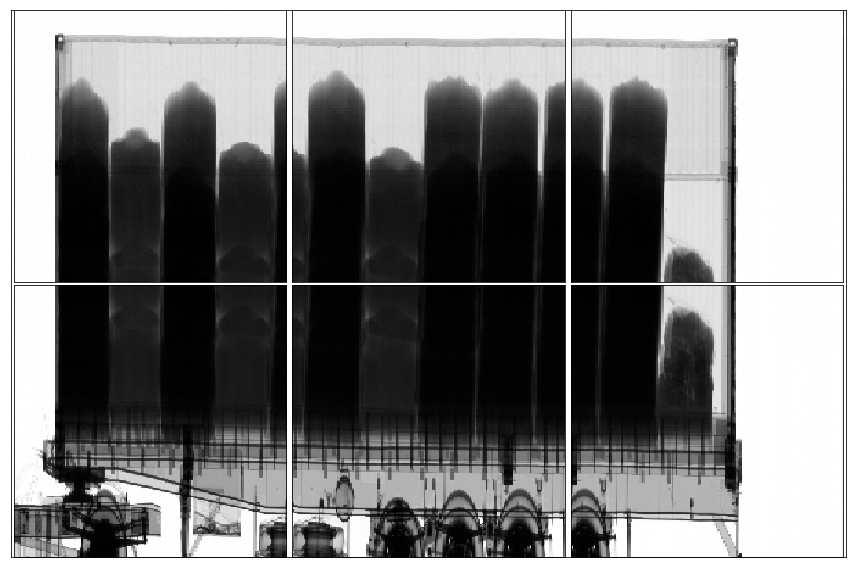

In [98]:
def plot_grid(img):
    coords = image_grid(img)
    fig = plt.figure(figsize=(12, 8))
    fig.subplots_adjust(hspace=0.01, wspace=0)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    for i, coord in enumerate(coords):
        cropped_img = img.crop(coord)
        ax = fig.add_subplot(2, 3, i + 1)
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.imshow(cropped_img)
plot_grid(img)

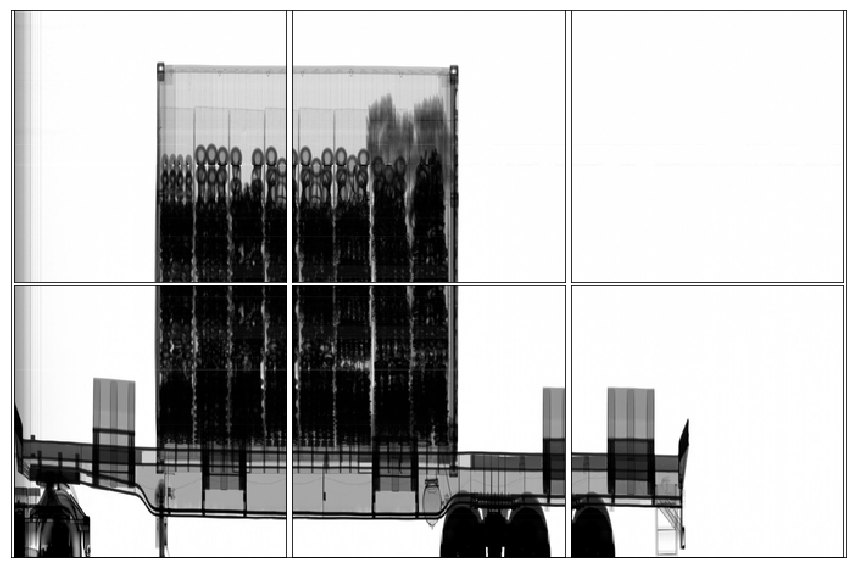

In [102]:
img = Image.open(os.path.join(caminho_bases, exemplos[0])).resize((600, 400), Image.ANTIALIAS)
plot_grid(img)

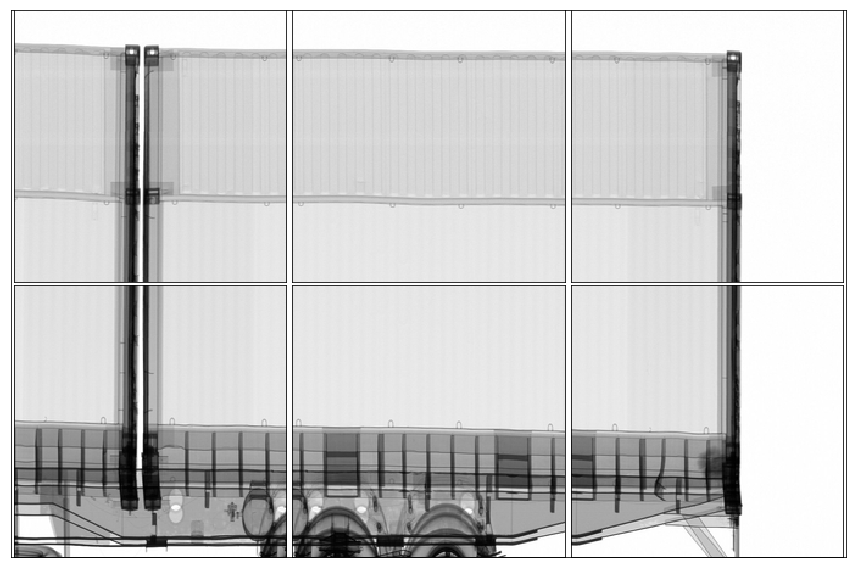

In [103]:
img = Image.open(os.path.join(caminho_bases, exemplos[1])).resize((600, 400), Image.ANTIALIAS)
plot_grid(img)

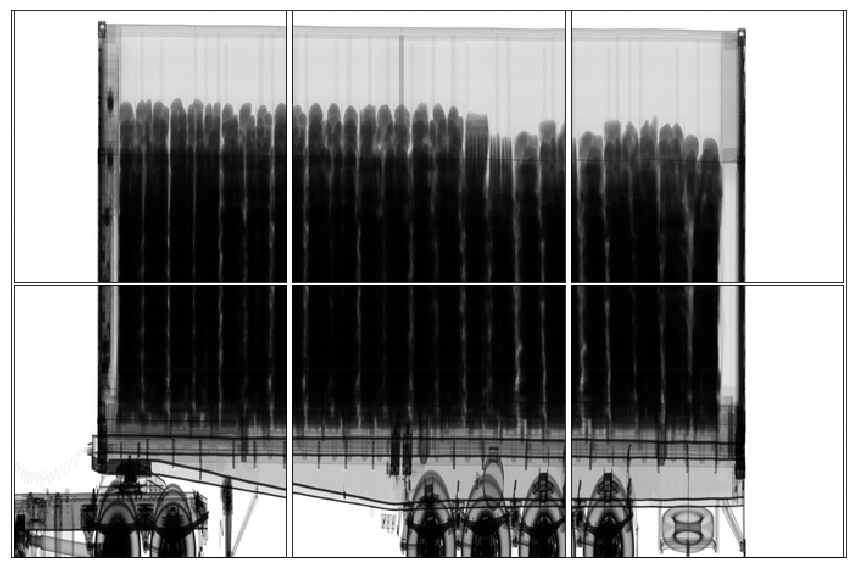

In [104]:
img = Image.open(os.path.join(caminho_bases, exemplos[2])).resize((600, 400), Image.ANTIALIAS)
plot_grid(img)

In [106]:
!which python

/home/ivan/pybr/projeto/venv/bin/python


In [108]:
import sys
sys.version

'3.5.2 (default, Nov 12 2018, 13:43:14) \n[GCC 5.4.0 20160609]'